## Install or import libraries

#### tensorflow is not being installed with Python 3.12 on Windows build.

In [73]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
#import mitdeeplearning as mdl


### 0-D tensors

In [4]:
integer = torch.tensor(10)
decimal = torch.tensor(10.0)

print(f"`integer` is a {integer.ndim}-dimension Tensor: {integer} of type {integer.dtype}")
print(f"`decimal` is a {decimal.ndim}-dimension Tensor: {decimal} of type {decimal.dtype}")

`integer` is a 0-d Tensor: 10 of type torch.int64
`decimal` is a 0-d Tensor: 10.0 of type torch.float32


### 1-D tensors

In [11]:
fibonacci = torch.tensor([0, 1, 1, 2, 3, 5, 8, 13])
count_to_100 = torch.tensor(range(1, 101))

print(f"`fibonacci` is a {fibonacci.dim()}-dimension Tensor: {fibonacci} of type {fibonacci.dtype}")
print(f"`count_to_100` is a {count_to_100.dim()}-dimension Tensor: {count_to_100} of type {count_to_100.dtype}")

`fibonacci` is a 1-dimension Tensor: tensor([ 0,  1,  1,  2,  3,  5,  8, 13]) of type torch.int64
`count_to_100` is a 1-dimension Tensor: tensor([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100]) of type torch.int64


### 2-D tensors

In [14]:
matrix = torch.tensor([[1, 2, 3], [0, 9, 8]])

assert isinstance(matrix, torch.Tensor)
assert matrix.dim() == 2

### 4-D tensors (image)

In [29]:
images = torch.zeros(10, 3, 256, 256)

assert isinstance(images, torch.Tensor)
assert images.dim() == 4
assert images.shape == (10, 3, 256, 256)

print(f"images is a {images.dim()}-dimensional tensor of shape: {images.shape}")

images is a 4-dimensional tensor of shape: torch.Size([10, 3, 256, 256])


### Slicing tensors

In [36]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print(f"matrix: {matrix}")
print(f"Slicing by row and getting second row: {row_vector}")
print(f"Slicing by column and getting second column: {column_vector}")
print(f"Slicing by element and getting an element or scalar value: {scalar}")

matrix: tensor([[1, 2, 3],
        [0, 9, 8]])
Slicing by row and getting second row: tensor([0, 9, 8])
Slicing by column and getting second column: tensor([2, 9])
Slicing by element and getting an element or scalar value: 2


## Tensor Computations

In [37]:
a = torch.tensor(55)
b = torch.tensor(45)

c1 = torch.add(a, b)
c2 = a + b

print(f"c1: {c1}")
print(f"c2: {c2}")

c1: 100
c2: 100


In [38]:
### Define Tensor computation function ###

# Constructing a simple computation function

def func(a, b):
  c = torch.add(a, b)
  d = torch.sub(b, 1)
  e = torch.mul(c, d)
  return e

In [42]:
a, b = 5, 8
e_out = func(a, b)
print(f"e_out: {e_out}")

e_out: 91


## 1. Neural Networks in Pytorch

### 1.1 Neural Networ using Module

***torch.nn.Module*** in PyTorch is a base class which acts like a framework used to build and train neural networks. \
Dense Layer in neural network is where each neuron a.k.a perceptron is connected with each perceptron in subsequent layers.

In [45]:
### Creating a dense layer in PyTorch ###

class DenseLayer(nn.Module):
  ## We initialize our layer with input features and output features
  def __init__(self, num_inputs, num_outputs):
    ## super() initializes a parent class that we inherit from
    super(DenseLayer, self).__init__()
    ## Randomly initialize weights and biases
    self.weights = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
    self.bias = torch.nn.Parameter(torch.randn(num_outputs))

  ## Implement the forward pass
  def forward(self, x):
    ## Apply weights and biases on input tensor
    z = torch.matmul(x, self.weights) + self.bias
    ## Apply the activation function (sigmoid in this case) on z to get output y
    y = torch.sigmoid(z)
    return y

In [46]:
## Testing the dense layer
num_inputs = 2
num_outputs = 3
layer = DenseLayer(num_inputs, num_outputs)

x_input = torch.tensor([[1, 2.]])
y = layer(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output results: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output results: tensor([[0.1874, 0.9526, 0.6919]], grad_fn=<SigmoidBackward0>)


### 1.2 Neural Network using Sequential API

***nn.Module*** allows us to conviniently create a neural network based on the number of input and outputs provided.\
We can also create network using ***Sequential*** and stacking ***Linear*** layer in it

In [54]:
## Define model using nn.Sequential

# define number of inputs and outputs
n_input_nodes, n_output_nodes = 2, 3

# Model using nn.Sequential
model = nn.Sequential(nn.Linear(n_input_nodes, n_output_nodes), nn.Sigmoid())

In [55]:
# Testing sequential model
x_input = torch.tensor([[1, 2.]])
model_output = model(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {model_output.shape}")
print(f"output results: {model_output}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output results: tensor([[0.6092, 0.4315, 0.6462]], grad_fn=<SigmoidBackward0>)



***nn.Module*** allows us to create custom models by subclassing, we can also group layers together.\

This allows us to customize:
1. Layers
2. Training loops
3. Activation functions
4. Models



In [56]:
## Define a model with subclassing

class LinearWithSigmoid(nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super(LinearWithSigmoid, self).__init__()
    ## Define the linear layer
    self.linear = nn.Linear(num_inputs, num_outputs)
    self.activation = nn.Sigmoid()

  def forward(self, x):
    linear_output = self.linear(x)
    output = self.activation(linear_output)
    return output

In [58]:
## Testing the model
input_dim, output_dim = 2, 3
model = LinearWithSigmoid(input_dim, output_dim)
x = torch.tensor([[1, 2.0]])
y = model(x)

print(f"input shape: {x.shape}")
print(f"output shape: {y.shape}")
print(f"output: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output: tensor([[0.3803, 0.6546, 0.5285]], grad_fn=<SigmoidBackward0>)


### Model with Identify option in Forward function

In [61]:
# Define model with identity parameter

class LinearWithIdentity(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearWithIdentity, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
    self.activation = nn.Sigmoid()

  def forward(self, x, isidentity=False):
    x_input = self.linear(x)
    if isidentity:
      output = x_input
      return output
    else:
      output = self.activation(x_input)
      return output
    



In [62]:
## Testing the identity model
input_dim, output_dim = 2, 3
model = LinearWithIdentity(input_dim, output_dim)
x_input = torch.tensor([[1, 2.0]])
output_without_identity = model(x_input)
output_with_identity = model(x_input, isidentity=True)

print(f"input : {x_input}")
print(f"output without identity: {output_without_identity}")
print(f"output with identity: {output_with_identity}")


input : tensor([[1., 2.]])
output without identity: tensor([[0.3788, 0.2029, 0.4661]], grad_fn=<SigmoidBackward0>)
output with identity: tensor([[-0.4946, -1.3682, -0.1356]], grad_fn=<AddmmBackward0>)


## Automatic differentiation in PyTorch
### For gradient calculation using backpropagation

In [63]:
## Gradient computation with PyTorch

x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
y.backward() # compute gradient

dy_dx = x.grad
print(f"dy/dx of y=x^2 at x=2.0 is: {dy_dx}")
assert dy_dx == 4.0

dy/dx of y=x^2 at x=2.0 is: 4.0


Initial value of x: -0.15531089901924133


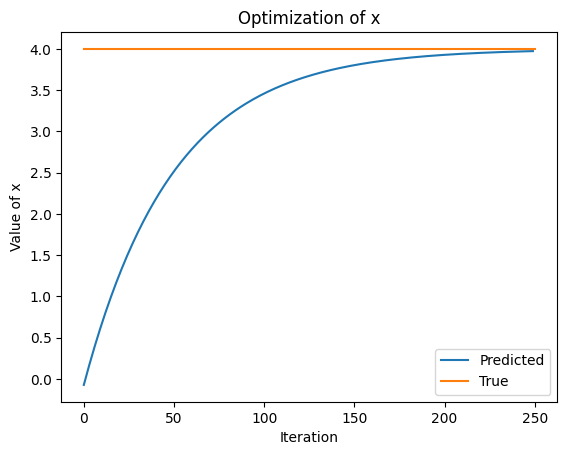

Accuracy: 99.33463335037231
Final value of x (Predicted): 3.9733853340148926


In [91]:
## Minimization of loss function using autograd and SGD

# Initialize a random value
x = torch.randn(1)
print(f"Initial value of x: {x.item()}")

# Define learning rate
learning_rate = 1e-2
history = []
# Target value
target = 4

# We will run gradient descent for 100 iterations. At each iteration, we will compute the loss, compute the 
# derivative of the loss with respect to x, and perform the update
iter = 250
for i in range(iter):
  x = torch.tensor([x], requires_grad=True)
  
  # Compute the loss
  loss = (x - target) ** 2

  # Backpropagate through the loss to compute gradients
  loss.backward()

  # Update x with gradient descent
  x = x.item() - learning_rate * x.grad

  history.append(x.item())

# Plot the evolution of x as we optimize towards the target
plt.plot(history)
plt.plot([0, iter], [target, target])
plt.legend(['Predicted', 'True'])
plt.xlabel('Iteration')
plt.ylabel('Value of x')
plt.title('Optimization of x')
plt.show()
print(f"Accuracy: {x.item()/target * 100}")
print(f"Final value of x (Predicted): {x.item()}")